# Dataset: ANAC - Dados dos vôos domésticos do ano de 2020

## Etapa de coleta de dados:
<strong>A coleta de dados é a parte cujo objetivo é reunir as informações relevantes para análise.</strong><br>
fonte: https://sas.anac.gov.br/sas/downloads/view/frmDownload.aspx?tema=14

## Etapa de preparação dos dados
<strong>Os dados para análise estão separados em meses, então irei fazer o procedimento de Consolidar arquivos CSV.

- Para realizar esse procedimento baixe todos os arquivos pelo link acima;
- Na pastas dos arquivos abra o "cmd";
- Digite os códigos de acordo a imagem abaixo;
- Será gerado um único arquivo csv.</strong>

In [17]:
from IPython.display import Image, display

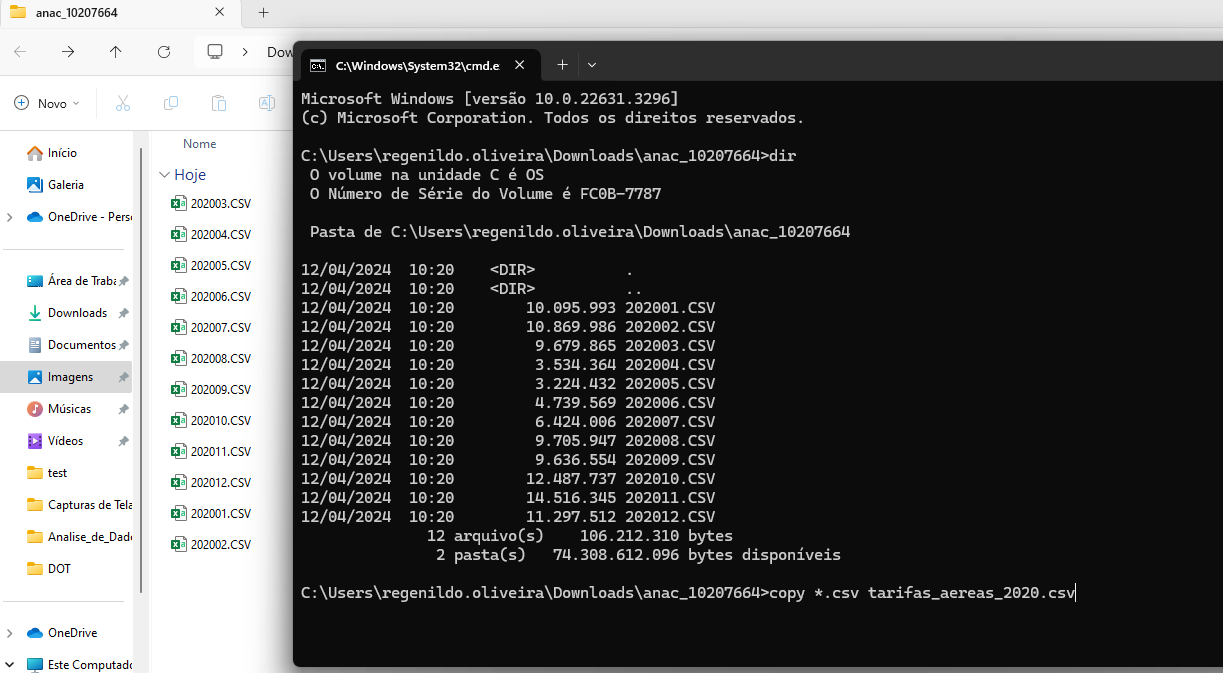

In [18]:
display(Image(filename='preparacao_dados_1.png'))

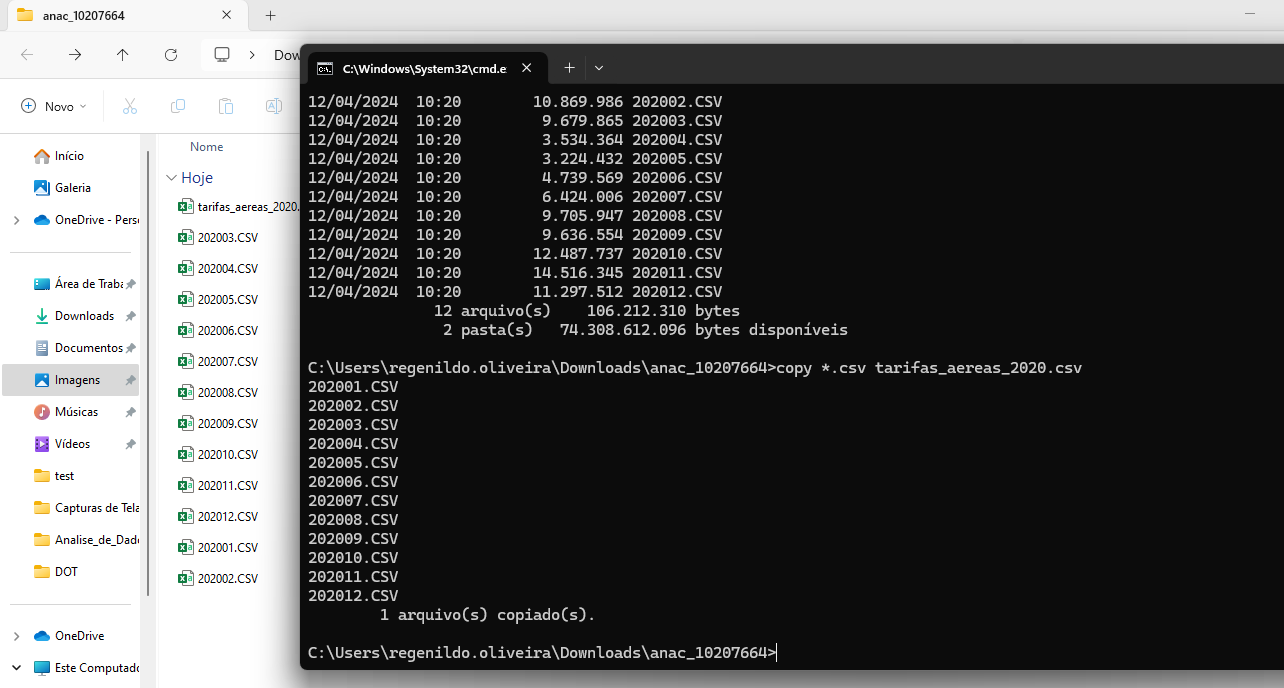

In [19]:
display(Image(filename='preparacao_dados_2.png'))

#### Ao abrir o arquivo é verificado que as linhas são separada por ponto e virgula (';')

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tarifas_aereas_2020.csv',sep=';', encoding='latin-1')


C:\Users\User\AppData\Local\Temp\ipykernel_6872\1924837948.py:1: DtypeWarning: Columns (0,1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tarifas_aereas_2020.csv',sep=';', encoding='latin-1')


#### Quando você recebe esse aviso ao usar o read_csv do Pandas, basicamente significa que você está carregando um CSV que possui uma coluna que consiste em vários dtypes . Por exemplo: 1,5,a,b,c,3,2,a possui uma mistura de strings e números inteiros.

#### O Pandas é muito bom porque, em vez de parar completamente, ele adivinha qual tipo de coluna possui. No entanto, por padrão, o Pandas possui o argumento low_memory=True. Isso significa que o arquivo CSV é dividido em vários pedaços e a estimativa é feita para cada pedaço, resultando em uma coluna com vários dtypes. Pandas é muito gentil em avisar que estava confuso e que algo pode ter acontecido.

#### Defina o argumento low_memory de read_csv como False

In [2]:
df = pd.read_csv('tarifas_aereas_2020.csv', low_memory=False, sep=';', encoding='latin-1')
df.head(n=6)

,Ano de Referência,Mês de Referência,ICAO Empresa Aérea,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Tarifa-N,Assentos Comercializados
0,2020,1,AZU,SBAC,SBCF,"693,9",2
1,2020,1,AZU,SBAC,SBFN,"404,9",2
2,2020,1,AZU,SBAC,SBGL,"1138,9",1
3,2020,1,AZU,SBAC,SBGL,"283,9",1
4,2020,1,AZU,SBAC,SBGL,"459,9",2
5,2020,1,AZU,SBAC,SBGL,"512,9",3


#### Continuando a etapa de preparação dos dados observou-se que o cabeçalho repetia-se. Para resolver isso iremos remover os cabeçalhos duplicados.

#### Como o cabeçalho têm caracteres especiais e acentos será padronizado para evitar problemas nos relatários.

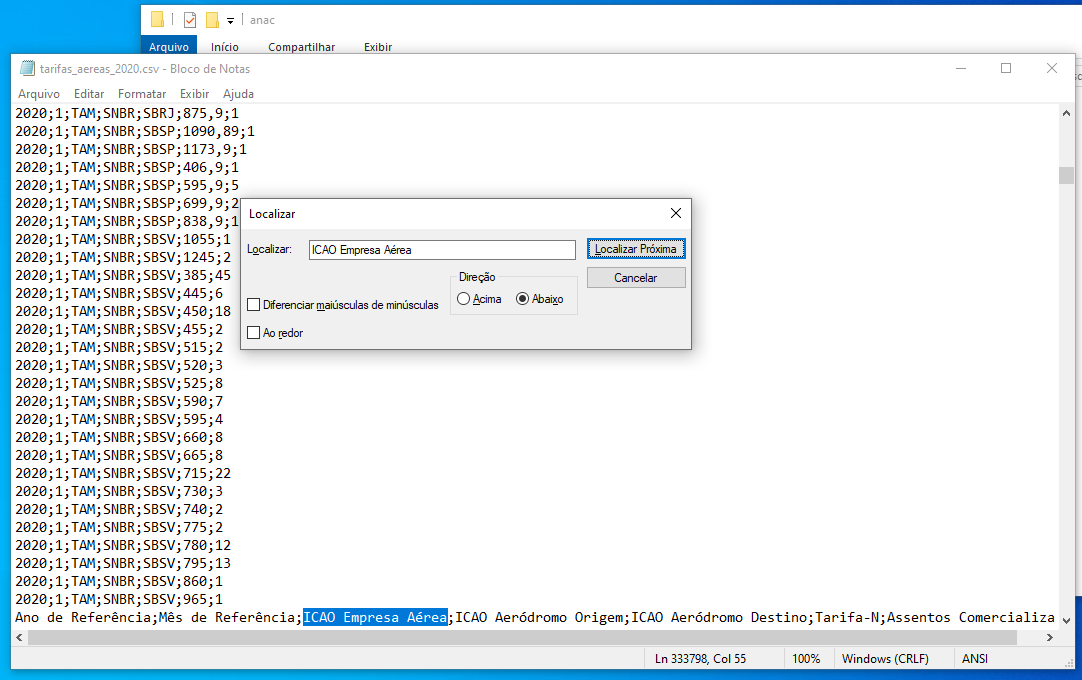

In [20]:
display(Image(filename='preparacao_dados_3.png'))

In [3]:
df = df[df['Ano de Referência'] != 'Ano de Referência']

# Resetar o índice
df.reset_index(drop=True, inplace=True)

# Padronizando o cabeçalho
headerList = ['ano_referencia','mes_referencia','empresa_aerea','aerodromo_origem','aerodromo_destino','tarifa-N','assentos_comercializados'] 

# Salvar o DataFrame resultante de volta no arquivo CSV
df.to_csv("tarifas_aereas1_2020.csv", header=headerList, index=False)

####

#### Ler o novo arquivo

In [4]:
df1 = pd.read_csv('tarifas_aereas1_2020.csv', low_memory=False, sep=',', encoding='latin-1')
df1.head(n=6)

,ano_referencia,mes_referencia,empresa_aerea,aerodromo_origem,aerodromo_destino,tarifa-N,assentos_comercializados
0,2020,1,AZU,SBAC,SBCF,"693,9",2
1,2020,1,AZU,SBAC,SBFN,"404,9",2
2,2020,1,AZU,SBAC,SBGL,"1138,9",1
3,2020,1,AZU,SBAC,SBGL,"283,9",1
4,2020,1,AZU,SBAC,SBGL,"459,9",2
5,2020,1,AZU,SBAC,SBGL,"512,9",3


## Etapa de Análise Exploratória de Dados
#### é o processo de investigação e descoberta de padrões, relacionamentos e insights nos dados. É a etapa em que o Analista de Dados explora todo o conjunto de informações reunido para ter uma melhor compreensão do que eles representam e quais perguntas podem ser respondidas a partir deles.

In [5]:
df1.info() # Verificar as informações sobre as colunas do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472253 entries, 0 to 3472252
Data columns (total 7 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   ano_referencia            object
 1   mes_referencia            object
 2   empresa_aerea             object
 3   aerodromo_origem          object
 4   aerodromo_destino         object
 5   tarifa-N                  object
 6   assentos_comercializados  object
dtypes: object(7)
memory usage: 185.4+ MB


#### Através da análise das seis linhas lidas com o código acima é possível verificar que a colulna "Tarifa-N" é do tipo object e casa decimal é separada por vírgula. Como você deve saber na linguagem Python números das casas decimais são separados por ponto e não vírgula.

#### Para corrigir basta executar o código abaixo:

In [6]:
df1.dtypes

ano_referencia              object
mes_referencia              object
empresa_aerea               object
aerodromo_origem            object
aerodromo_destino           object
tarifa-N                    object
assentos_comercializados    object
dtype: object

In [7]:
# Substitua as vírgulas por pontos na coluna 'Tarifa-N'
df1['tarifa-N'] = df1['tarifa-N'].str.replace(',', '.')
df1.head()

,ano_referencia,mes_referencia,empresa_aerea,aerodromo_origem,aerodromo_destino,tarifa-N,assentos_comercializados
0,2020,1,AZU,SBAC,SBCF,693.9,2
1,2020,1,AZU,SBAC,SBFN,404.9,2
2,2020,1,AZU,SBAC,SBGL,1138.9,1
3,2020,1,AZU,SBAC,SBGL,283.9,1
4,2020,1,AZU,SBAC,SBGL,459.9,2


O código df1['tarifa-N'] = df1['tarifa-N'].str.replace(',', '.') faz o seguinte:
- utiliza o método replace() do pandas para substituir valores em um DataFrame.
- O dicionário (',': '.') especifica que queremos substituir todas as ocorrências da vírgula (',') pelo ponto ('.').

In [9]:
df1.tail() # Verificar as últimas linhas do DataFrame usando

,ano_referencia,mes_referencia,empresa_aerea,aerodromo_origem,aerodromo_destino,tarifa-N,assentos_comercializados
3472248,2020,12,TAM,SNTF,SBRJ,1105.9,1
3472249,2020,12,TAM,SNTF,SBRJ,602.9,1
3472250,2020,12,TAM,SNTF,SBSP,542.9,3
3472251,2020,12,TAM,SNTF,SBSP,987.9,3
3472252,,NaN,NaN,NaN,NaN,NaN,NaN


#### Através da análise das últimas linhas com o código acima é possível verificar que existe valores Nan - Esses valores indicam que essas célula ou informações da base de dados não foram preenchidas

#### Vamos fazer uma busca pela soma dos valores vazios para ver se existe mais

In [10]:
df1.isnull().sum()

ano_referencia              0
mes_referencia              1
empresa_aerea               1
aerodromo_origem            1
aerodromo_destino           1
tarifa-N                    1
assentos_comercializados    1
dtype: int64

#### Como podemos ver que dataframe contêm valores Nan

#### Qual o método para tratar valores vazios?

#### Cada situação em que existe um valor vazio deve ser analisado separadamente, em alguns casos podemos apenas substituir o vazio por zero, mas nesse exemplo os tipos dados são variados, então o método a ser utilizado será a exclusão dos valores Nan.

#### No Pandas, existe o método drop para os data frames.:

In [11]:
df1 = df1.dropna()

In [12]:
df1.tail() # Verificar as últimas linhas do DataFrame usando

,ano_referencia,mes_referencia,empresa_aerea,aerodromo_origem,aerodromo_destino,tarifa-N,assentos_comercializados
3472247,2020,12,TAM,SNTF,SBCF,311.66,2
3472248,2020,12,TAM,SNTF,SBRJ,1105.9,1
3472249,2020,12,TAM,SNTF,SBRJ,602.9,1
3472250,2020,12,TAM,SNTF,SBSP,542.9,3
3472251,2020,12,TAM,SNTF,SBSP,987.9,3


In [13]:
df1.shape # Verificar as dimensões do DataFram

(3472252, 7)

In [14]:
df1.describe() # Verificar as estatísticas descritivas básicas do DataFrame

,ano_referencia,mes_referencia,empresa_aerea,aerodromo_origem,aerodromo_destino,tarifa-N,assentos_comercializados
count,3472252,3472252,3472252,3472252,3472252,3472252,3472252
unique,3,14,8,179,179,113921,1262
top,2020,11,AZU,SBGR,SBGR,299.9,1
freq,3472250,463440,1419542,299431,293167,5028,1475149


### Qual empresa vendeu mais Assentos de acordo com o mês

In [15]:
# Agrupando os dados por mês e empresa, e somando os assentos comercializados
total_assentos_por_empresa_por_mes = df1.groupby(['mes_referencia', 'empresa_aerea'])['assentos_comercializados'].sum()

# Encontrando a empresa que vendeu mais assentos comercializados para cada mês
empresa_mais_vendida_por_mes = total_assentos_por_empresa_por_mes.groupby('mes_referencia').idxmax().reset_index()

# Imprimindo o resultado
empresa_mais_vendida_por_mes

,mes_referencia,assentos_comercializados
0,1,"(1, TAM)"
1,10,"(10, PTB)"
2,11,"(11, SUL)"
3,12,"(12, SUL)"
4,2,"(2, GLO)"
5,3,"(3, PTB)"
6,4,"(4, GLO)"
7,5,"(5, PAM)"
8,6,"(6, SUL)"
9,7,"(7, PTB)"


### Qual empresa teve a maior Tarifa de acordo com o mês

In [16]:
# Convertendo a coluna 'Tarifa-N' para float (se necessário)
#df_NaN_removidos['tarifa-N'] = df_NaN_removidos['tarifa-N'].str.replace(',', '.').astype(float)

# Encontrando a empresa com a maior tarifa-N para cada mês
maior_tarifa_por_empresa_por_mes = df1.groupby(['mes_referencia', 'empresa_aerea'])['tarifa-N'].max()

# Encontrando a empresa com a maior tarifa-N para cada mês
empresa_maior_tarifa_por_mes = maior_tarifa_por_empresa_por_mes.groupby('mes_referencia').idxmax().reset_index()

# Imprimindo o resultado
empresa_maior_tarifa_por_mes

,mes_referencia,tarifa-N
0,1,"(1, TAM)"
1,10,"(10, PTB)"
2,11,"(11, PTB)"
3,12,"(12, PTB)"
4,2,"(2, TAM)"
5,3,"(3, GLO)"
6,4,"(4, TAM)"
7,5,"(5, AZU)"
8,6,"(6, PTB)"
9,7,"(7, PTB)"


### Qual a companhia teve maior faturamento e o menor?

#### Devido aos erros foi Convertido a coluna 'tarifa-N' e 'assentos_comercializados' para float

In [19]:
#Convertendo a coluna 'tarifa-N' para float
df1['tarifa-N'] = pd.to_numeric(df1['tarifa-N'], errors='coerce')

# Convertendo a coluna 'assentos_comercializados' para float
df1['assentos_comercializados'] = pd.to_numeric(df1['assentos_comercializados'], errors='coerce')

# Calculando o faturamento para cada companhia
df1['faturamento'] = df1['tarifa-N'] * df1['assentos_comercializados']

# Agrupando os dados pela companhia e somando o faturamento
faturamento_por_companhia = df1.groupby('empresa_aerea')['faturamento'].sum()

# Encontrando a companhia com maior faturamento
companhia_maior_faturamento = faturamento_por_companhia.idxmax()
maior_faturamento = faturamento_por_companhia.max()

# Encontrando a companhia com menor faturamento
companhia_menor_faturamento = faturamento_por_companhia.idxmin()
menor_faturamento = faturamento_por_companhia.min()

In [20]:
companhia_maior_faturamento, maior_faturamento

('GLO', 2827313299.87)

In [21]:
companhia_menor_faturamento, menor_faturamento

('EMPRESA', 0.0)

#### O resultado da análise da companhia_menor_faturamento e menor_faturamento trouxe não condiz resultado esperado. Isso pode ser a base de dados ainda contêm sujeira

#### Com o resultado do código abaixo que calcular o valor mínimo coluna 'tarifa-N' para cada empresa verificou que base de dados ainda tem valores Nan

In [23]:
df1.groupby('empresa_aerea')['tarifa-N'].agg(['min'])

,min
empresa_aerea,
AZU,23.16
EMPRESA,NaN
GLO,1.00
ICAO Empresa AÃÂ©rea,NaN
PAM,79.90
PTB,48.85
SUL,179.00
TAM,35.90


#### Excluíndo os valores Nan

In [24]:
df1 = df1.dropna()

In [25]:
df1.groupby('empresa_aerea')['tarifa-N'].agg(['min'])

,min
empresa_aerea,
AZU,23.16
GLO,1.00
PAM,79.90
PTB,48.85
SUL,179.00
TAM,35.90


### Qual a companhia teve maior faturamento e o menor?

In [26]:
#Convertendo a coluna 'tarifa-N' para float
df1['tarifa-N'] = pd.to_numeric(df1['tarifa-N'], errors='coerce')

# Convertendo a coluna 'assentos_comercializados' para float
df1['assentos_comercializados'] = pd.to_numeric(df1['assentos_comercializados'], errors='coerce')

# Calculando o faturamento para cada companhia
df1['faturamento'] = df1['tarifa-N'] * df1['assentos_comercializados']

# Agrupando os dados pela companhia e somando o faturamento
faturamento_por_companhia = df1.groupby('empresa_aerea')['faturamento'].sum()

# Encontrando a companhia com maior faturamento
companhia_maior_faturamento = faturamento_por_companhia.idxmax()
maior_faturamento = faturamento_por_companhia.max()

# Encontrando a companhia com menor faturamento
companhia_menor_faturamento = faturamento_por_companhia.idxmin()
menor_faturamento = faturamento_por_companhia.min()

In [27]:
companhia_menor_faturamento, menor_faturamento

('SUL', 1990222.0)

In [29]:
df1.groupby('empresa_aerea')['tarifa-N'].agg(['max']) #valor máximo coluna 'tarifa-N' para cada empresa

,max
empresa_aerea,
AZU,4488.90
GLO,2200.45
PAM,1800.00
PTB,1999.99
SUL,2129.00
TAM,4711.90
